<a href="https://colab.research.google.com/github/SankirthGunnam/FastAI/blob/main/DogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Install and Import FastAI

First, we need to ensure FastAI is installed and then import the necessary modules. FastAI typically relies on PyTorch.

In [2]:
# Uncomment and run if fastai is not already installed
!pip install -Uq fastai

from fastai.vision.all import *

print("FastAI imported successfully!")

FastAI imported successfully!


### 2. Download and Prepare the Dataset

We'll use the Oxford-IIIT Pet Dataset, which is readily available via FastAI's `untar_data` function. We then define how to get the image labels from the filenames.

In [3]:
path = untar_data(URLs.PETS)
path_images = path/'images'

def get_label(fname):
    return fname[0].isupper()

print(f"Dataset downloaded to: {path}")

Dataset downloaded to: /root/.fastai/data/oxford-iiit-pet


### 3. Create a DataBlock

The `DataBlock` API in FastAI is a flexible way to define how your data should be processed, from getting items to creating batches for training.

DataLoaders created and a batch shown.


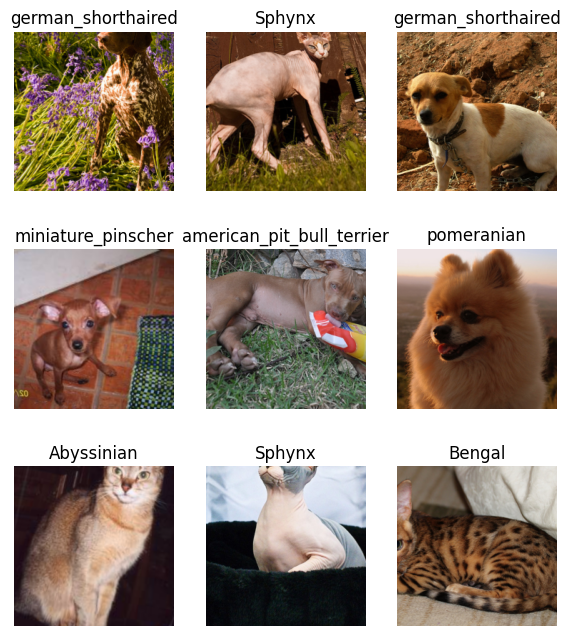

In [4]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_.+\..+'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = dblock.dataloaders(path_images)

dls.show_batch(max_n=9, figsize=(7, 8))
print("DataLoaders created and a batch shown.")

### 4. Create and Train the Learner

We'll use a pre-trained `resnet34` convolutional neural network as our backbone and fine-tune it for our specific task. FastAI's `cnn_learner` simplifies this process.

epoch,train_loss,valid_loss,error_rate,time
0,1.457429,0.333433,0.104871,00:57


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.487590,0.467052,0.124493,00:59
1,0.358201,0.281745,0.079161,01:00
2,0.216866,0.240684,0.070365,00:59


Model training complete!


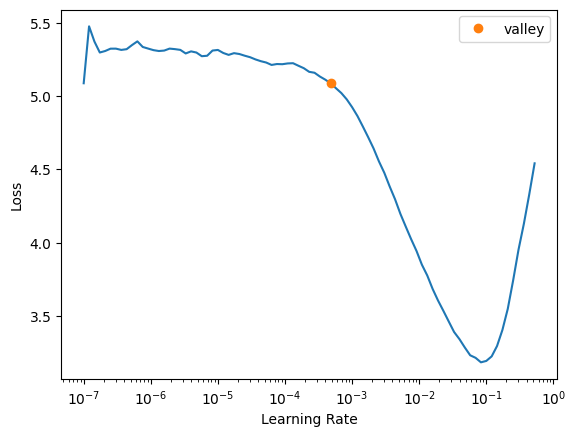

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

# Find a good learning rate (optional, but recommended)
learn.lr_find()

# Fine-tune the model for a few epochs
learn.fine_tune(3)

print("Model training complete!")

To find a good learning rate, you can use FastAI's learning rate finder. This method runs a quick training pass with varying learning rates and records the loss. The plot helps identify a range where the loss decreases consistently, often suggesting a good learning rate to start with.

In [ ]:
# learn = cnn_learner(dls, resnet34, metrics=error_rate)

# lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep)) # find a good learning rate

# print(f"Suggested learning rate based on minimum loss: {lr_min:.2e}")
# print(f"Suggested learning rate based on steepest gradient: {lr_steep:.2e}")

The `lr_find()` method will plot the loss against the learning rate. You'd typically choose a learning rate from the steepest downward slope of the curve, usually an order of magnitude less than the point where the loss starts to increase.

### 5. Show Results and Make Predictions

Let's visualize the results and make a prediction on an individual image.

Actual label: samoyed
Predicted label: shiba_inu
Probability of prediction: 0.1081
Example prediction shown.


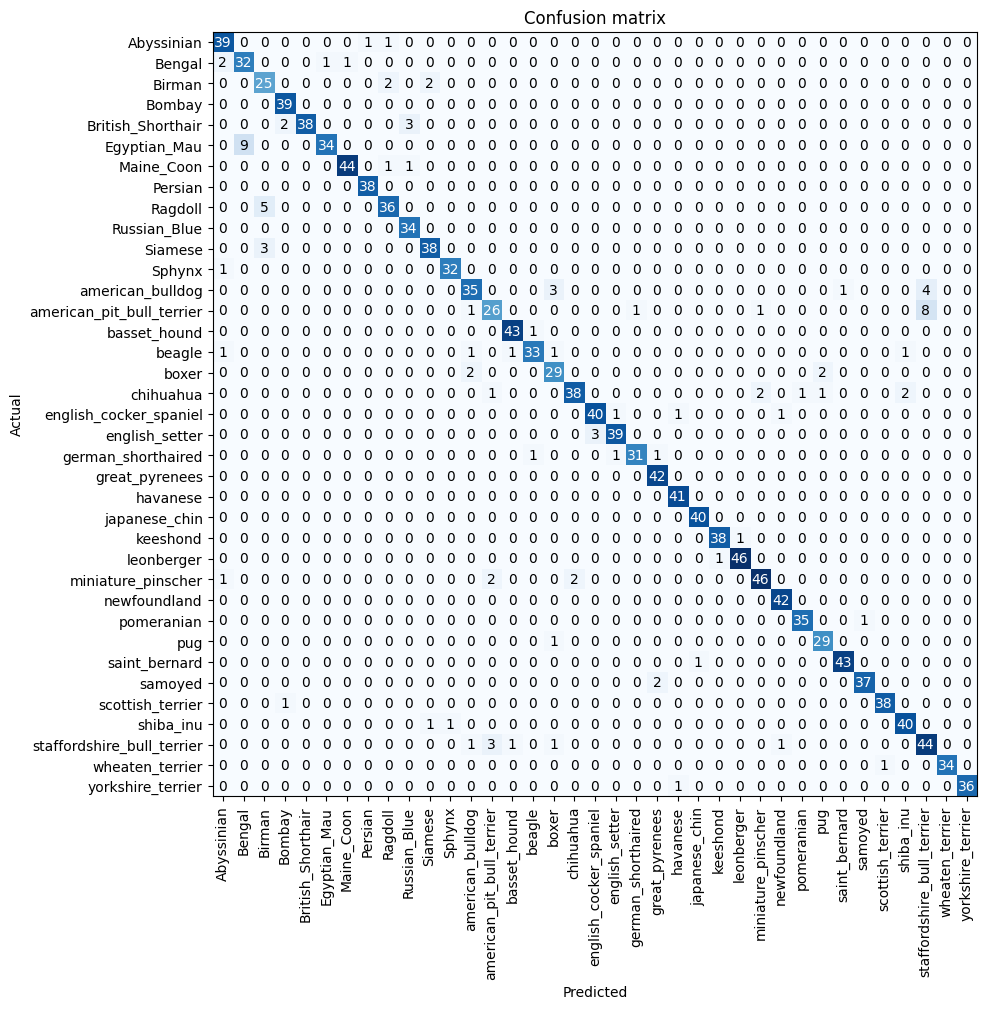

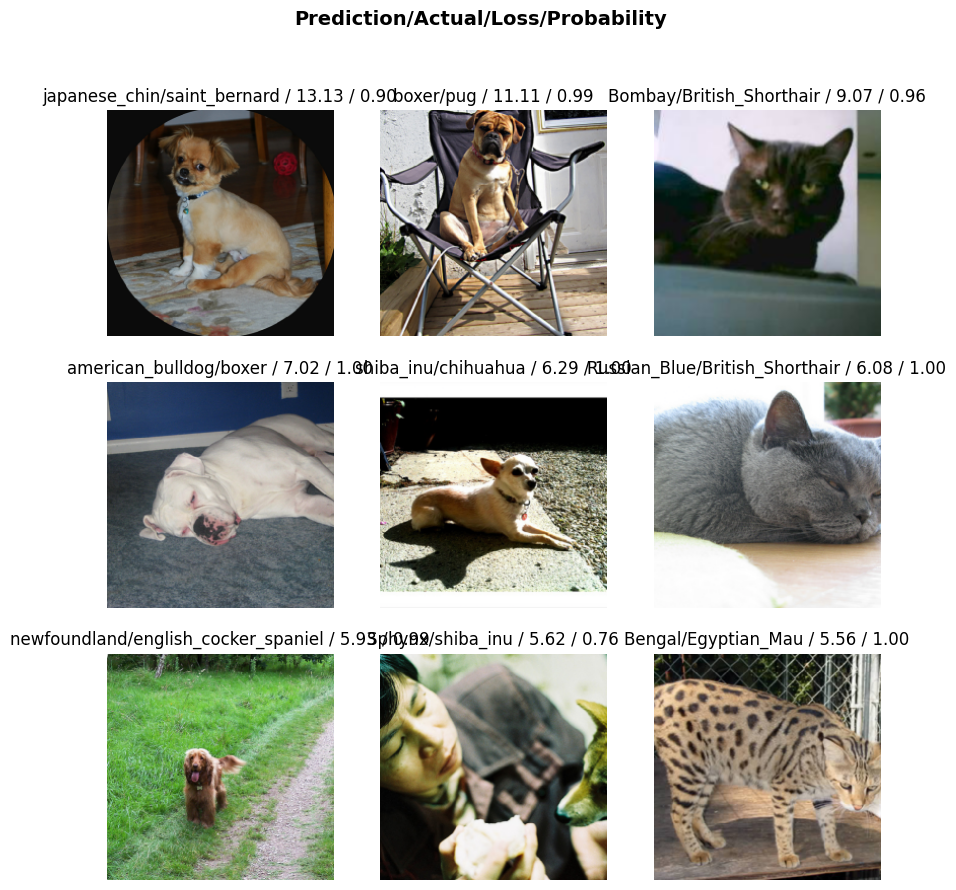

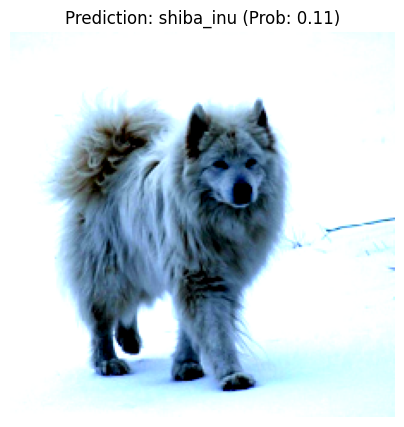

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10))

# Show top losses
interp.plot_top_losses(9, figsize=(10, 10))

# Example prediction on a random image from the test set
x, y = dls.valid.one_batch()
r = random.randint(0, len(x)-1)
img = x[r].cpu() # Move the image tensor to CPU

pred, pred_idx, probs = learn.predict(img)

print(f"Actual label: {dls.vocab[y[r]]}")
print(f"Predicted label: {pred}")
print(f"Probability of prediction: {probs[pred_idx]:.4f}")

img.show(title=f'Prediction: {pred} (Prob: {probs[pred_idx]:.2f})')

print("Example prediction shown.")